
# 03 – Probabilistic Models for Anomaly Detection

**Module:** Anomaly & Fraud Detection  
**Topic:** Statistical Methods

This notebook demonstrates using **probabilistic models** such as Gaussian Mixture Models (GMM)
and Kernel Density Estimation (KDE) to detect anomalies in tabular datasets.

## Objective

Build a workflow that:
- Fits probabilistic distributions to data  
- Computes anomaly scores or likelihoods  
- Flags low-probability events as anomalies  
- Supports multivariate analysis

## Design Principles

✔ Model-based anomaly scoring  
✔ Avoids arbitrary thresholds  
✔ Compatible with multivariate features  
✔ Can integrate into pipelines for monitoring

## Imports and Setup


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KernelDensity

np.random.seed(2010)

## Simulated Dataset with Anomalies

In [35]:
data_normal = np.random.normal(50, 5, size=1000)
data_anomalies = np.array([80, 90, 100])
data = np.concatenate([data_normal, data_anomalies])
df = pd.DataFrame({'value': data})

 ## Gaussian Mixture Model (GMM)

In [38]:
gmm = GaussianMixture(n_components=1, covariance_type='full', random_state=42)
gmm.fit(df[['value']])
df['gmm_score'] = gmm.score_samples(df[['value']])  # log-likelihood

#### Lower log-likelihood -> more anomalous

In [41]:
threshold = np.percentile(df['gmm_score'], 5)  # flag lowest 5% as anomalies
df['gmm_anomaly'] = df['gmm_score'] < threshold

## Kernel Density Estimation (KDE)


In [44]:
kde = KernelDensity(kernel='gaussian', bandwidth=2.0)
kde.fit(df[['value']])
df['kde_score'] = kde.score_samples(df[['value']])
threshold_kde = np.percentile(df['kde_score'], 5)
df['kde_anomaly'] = df['kde_score'] < threshold_kde

 ## Visualization

In [51]:
df

,value,gmm_score,gmm_anomaly,kde_score,kde_anomaly
0,49.471482,-2.639127,False,-2.634761,False
1,47.453517,-2.765523,False,-2.773187,False
2,53.672418,-2.805858,False,-2.821077,False
3,49.896006,-2.629598,False,-2.620761,False
4,37.919214,-5.174973,True,-5.042314,True
...,...,...,...,...,...
998,53.775301,-2.817227,False,-2.834333,False
999,44.009354,-3.290786,False,-3.277895,False
1000,80.000000,-17.075357,True,-8.522833,True
1001,90.000000,-28.472594,True,-8.522829,True


C:\Users\pantu\AppData\Local\Temp\ipykernel_17856\3364516110.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


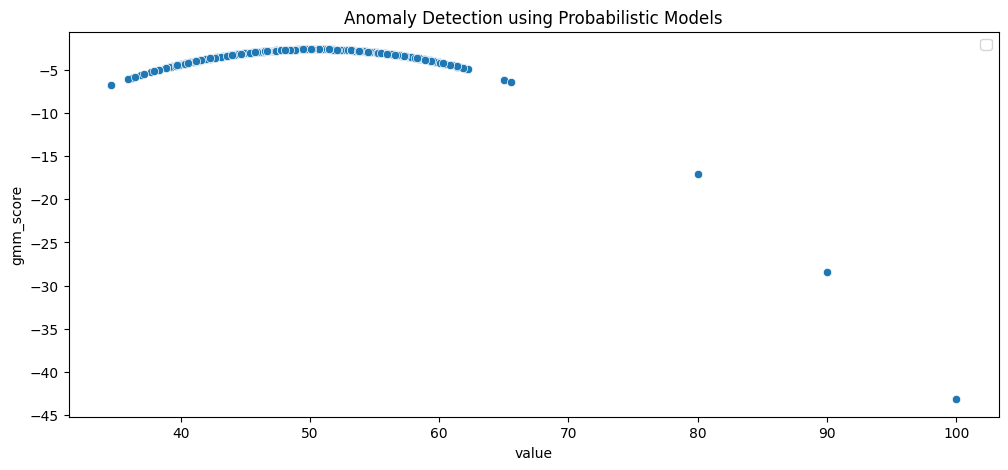

In [87]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df['value'], y=df['gmm_score'])
plt.legend()
plt.title('Anomaly Detection using Probabilistic Models')
plt.show()

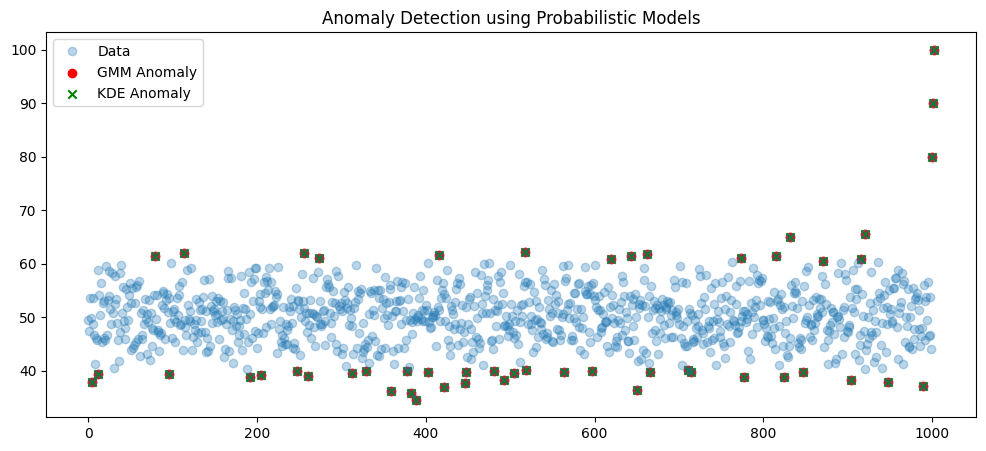

In [85]:
plt.figure(figsize=(12,5))
plt.plot(df['value'], label='Data', marker='o', linestyle='None', alpha=0.3)
plt.scatter(df.index[df['gmm_anomaly']], df['value'][df['gmm_anomaly']], color='red', label='GMM Anomaly')
plt.scatter(df.index[df['kde_anomaly']], df['value'][df['kde_anomaly']], color='green', marker='x', label='KDE Anomaly')
plt.legend()
plt.title('Anomaly Detection using Probabilistic Models')
plt.show()



## Step 5 – Integration Notes

- GMM can handle multivariate features and learn the underlying distribution
- KDE is non-parametric and can capture complex distributions
- Both methods produce **probabilistic anomaly scores**
- Thresholds can be selected based on business risk or historical distributions

    
## Production Checklist

✔ Fit models only on training data  
✔ Compute anomaly scores on unseen data  
✔ Thresholds aligned with risk tolerance  
✔ Integrate flags into alerting or monitoring systems

    
## Key Takeaways

- Probabilistic models provide interpretable anomaly scores  
- Flexible for multivariate and complex data  
- Threshold selection is critical for balancing false positives/negatives


                                  
## Next Steps

- Extend to multivariate GMM or KDE  
- Combine with classical ML anomaly detectors (Isolation Forest, LOF)  
- Integrate probabilistic scores into ensemble or pipeline-based anomaly detection systems